In [2]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import scikitplot as skl
sns.set()

In [3]:
# Let's use the handy function we created
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [4]:
data = pd.read_csv(r"D:\INEURONE\MachineLARNING\Logistic-regression_final\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# what standard deviation tells us 
# agar zero hai toh sare data point ek hi number se full hai
# agar sare data point 1-50 k bichme hai toh SD inmese hi hoga leking ek bhi point mene 1000 rkh diya toh uski value 400 k aspas ajayegi 
# so high value of SD says that data is higly spread and low value of Sd says that ki apka sara data mean k around hi hai

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Seems like there is no missing values in our data. Great, let's see the distribution of data:

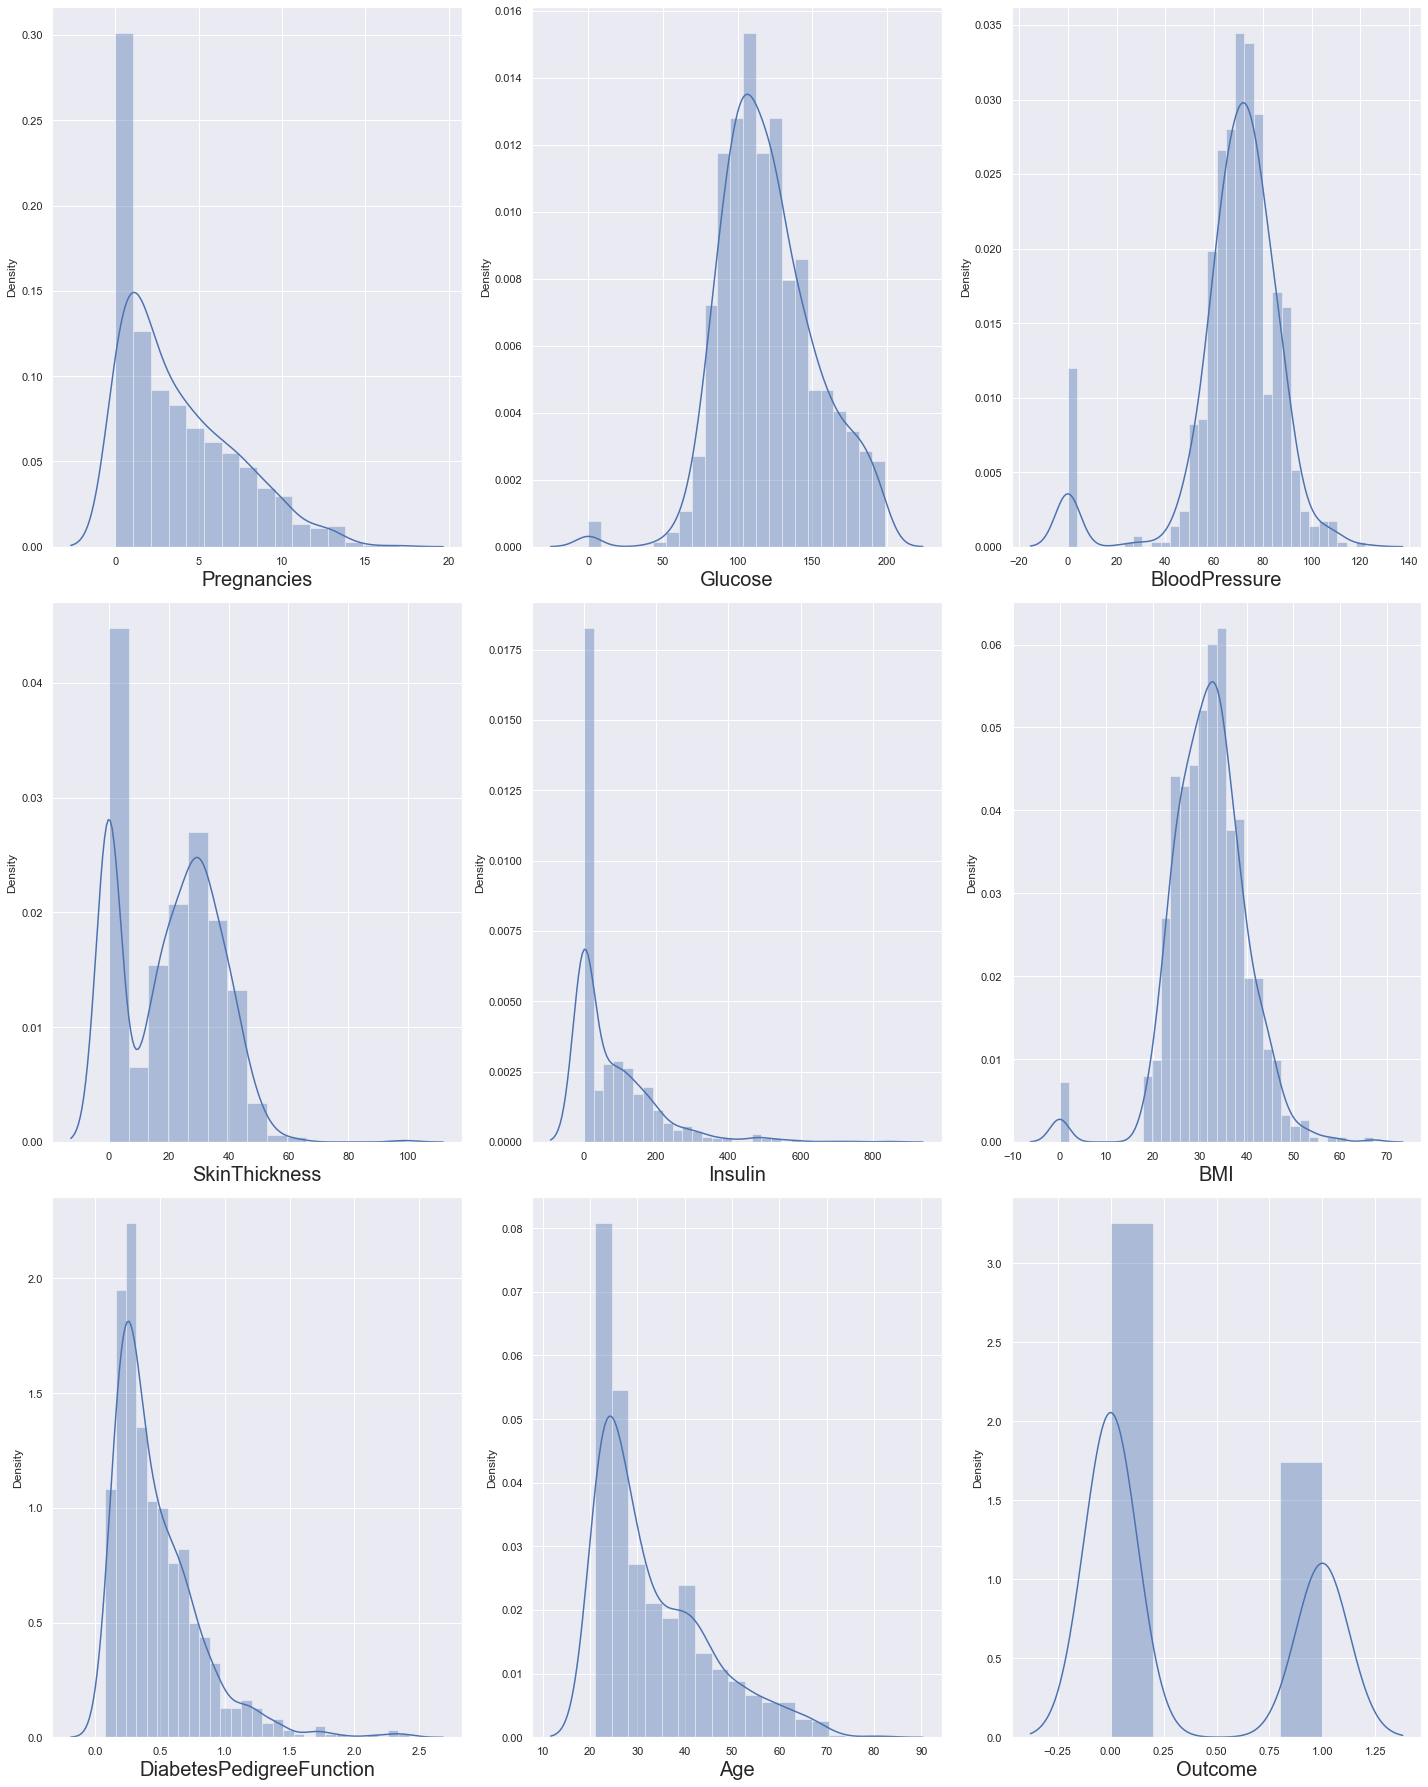

In [63]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [64]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
#pregrnancies data also look skewed towards left because of some outliers, let's remove them
# q = data['Pregnancies'].quantile(0.95)
# data_cleaned = data[data['Pregnancies']<q]


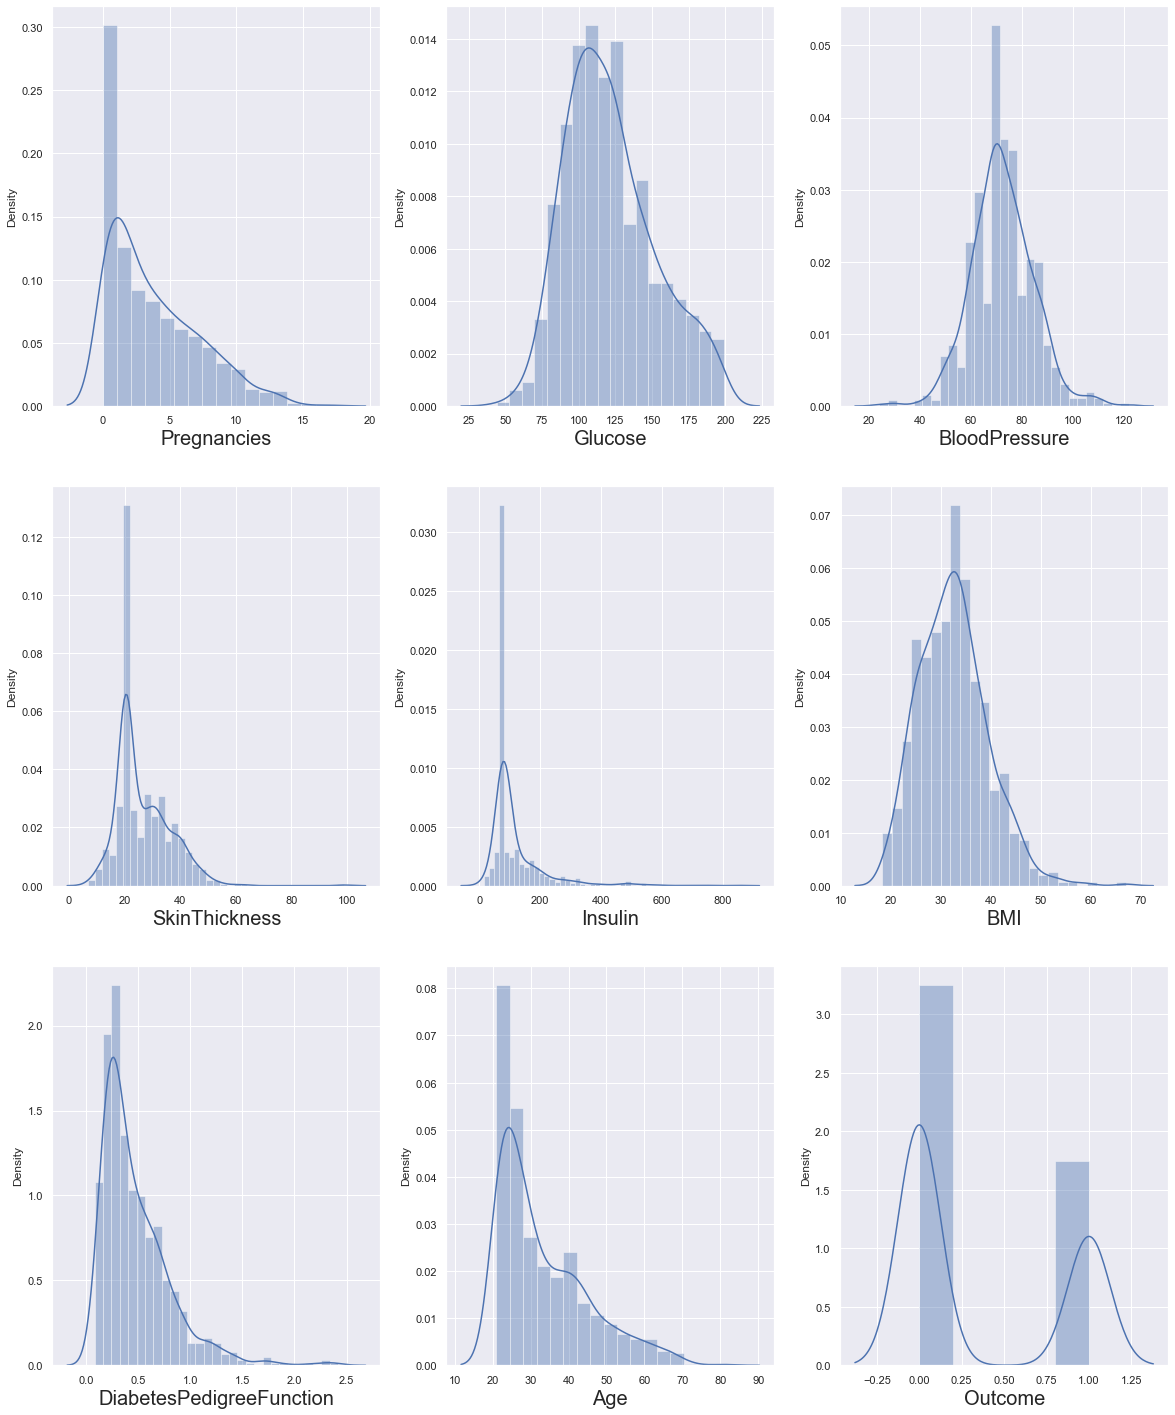

In [65]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Great, now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
let's deal with them.

<AxesSubplot:>

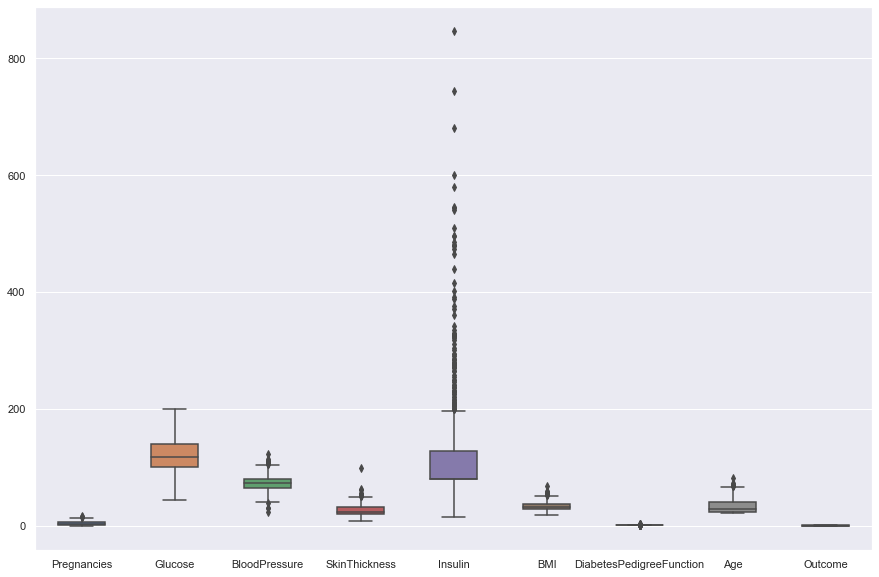

In [66]:
fig,ax = plt.subplots(figsize= (15,10))
sns.boxplot(data = data ,width = 0.5 , ax = ax,fliersize = 5)

In [67]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

**yaha mujhe doubt hai ki ek column k outlier ko nikalne k chakker me baki**
**ke column bhi uda diye , toh kya ye sahi tarika hai?**

In [68]:
data.shape

(768, 9)

In [69]:
data_cleaned.shape

(674, 9)

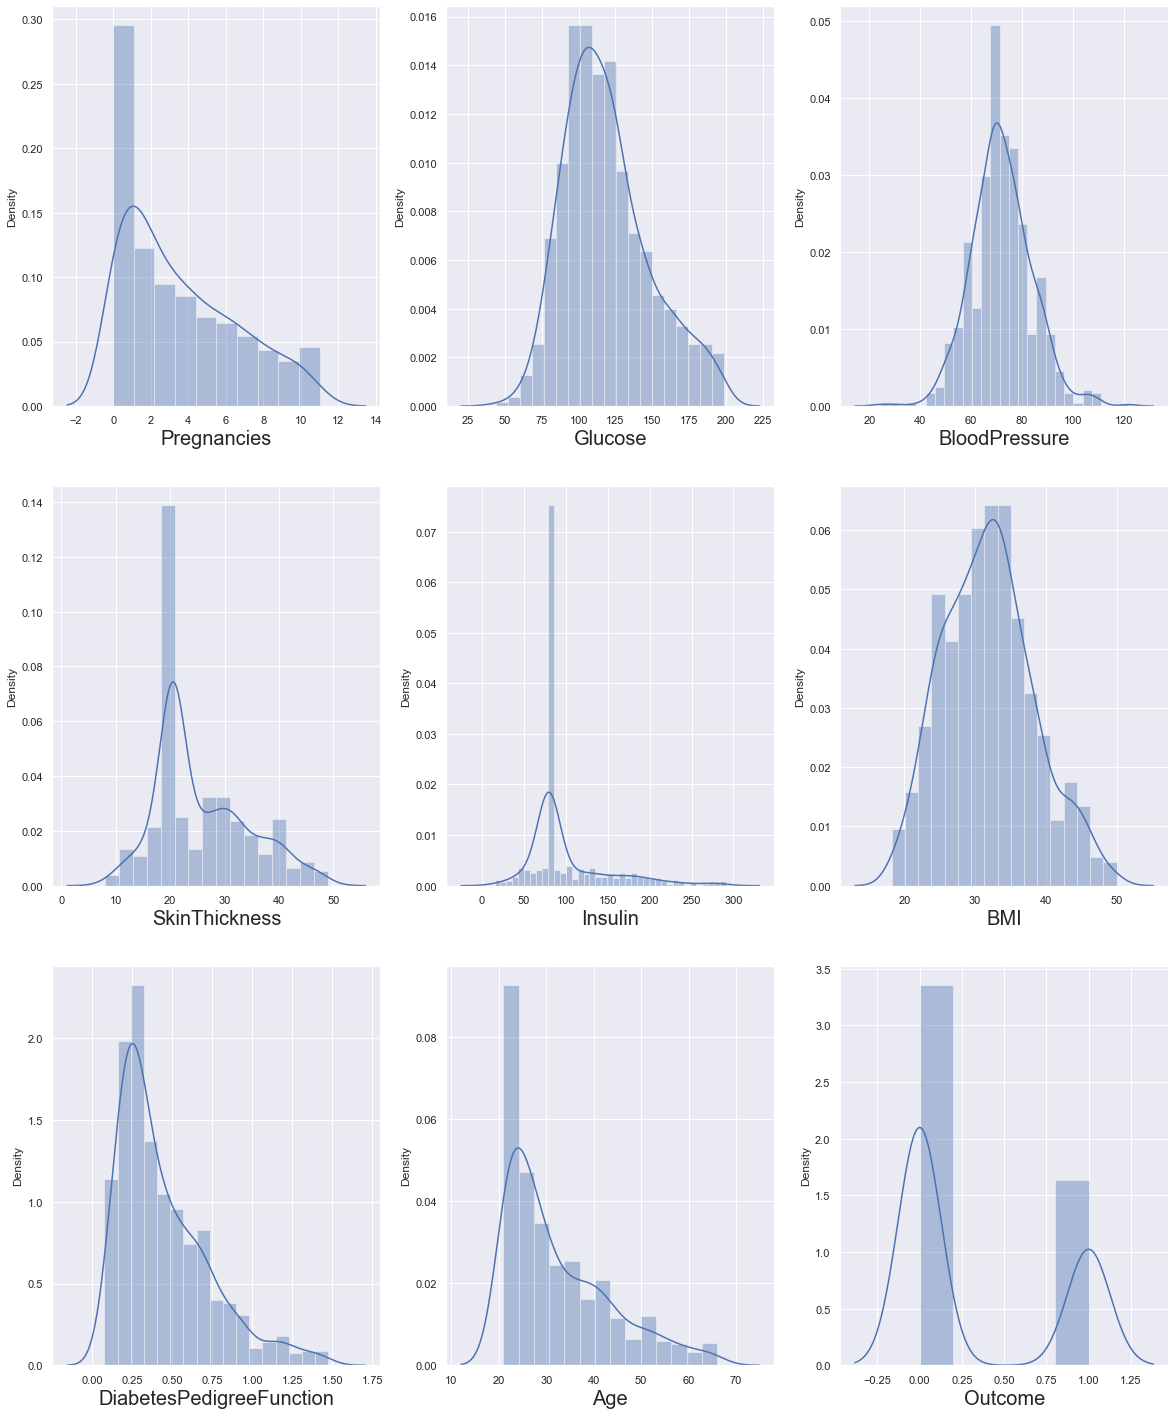

In [70]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


The data looks much better now than before. We will start our analysis with this data now as we don't want to loose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.



<AxesSubplot:>

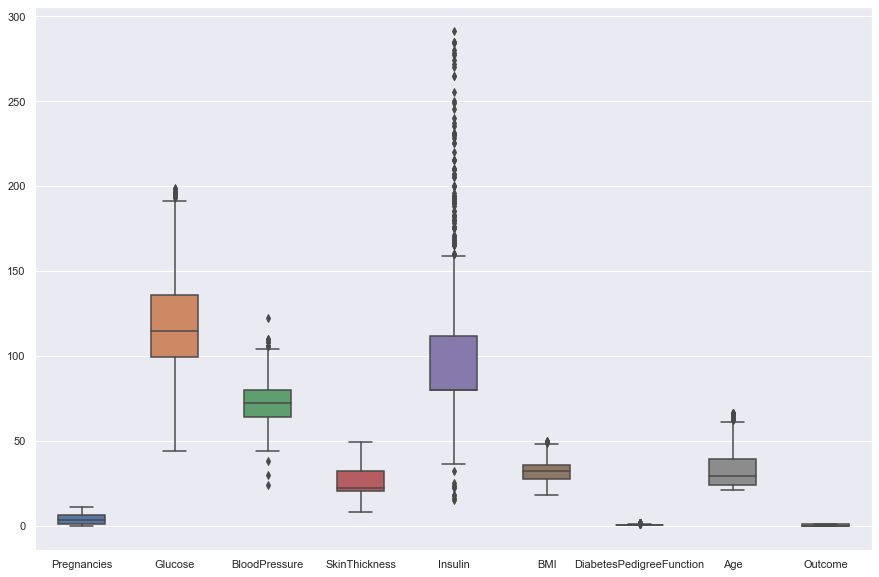

In [71]:
fig,ax = plt.subplots(figsize= (15,10))
sns.boxplot(data = data_cleaned ,width = 0.5 , ax = ax,fliersize = 5)

In [72]:
# we can try log transformatiion or box-cox

In [73]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [74]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [75]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

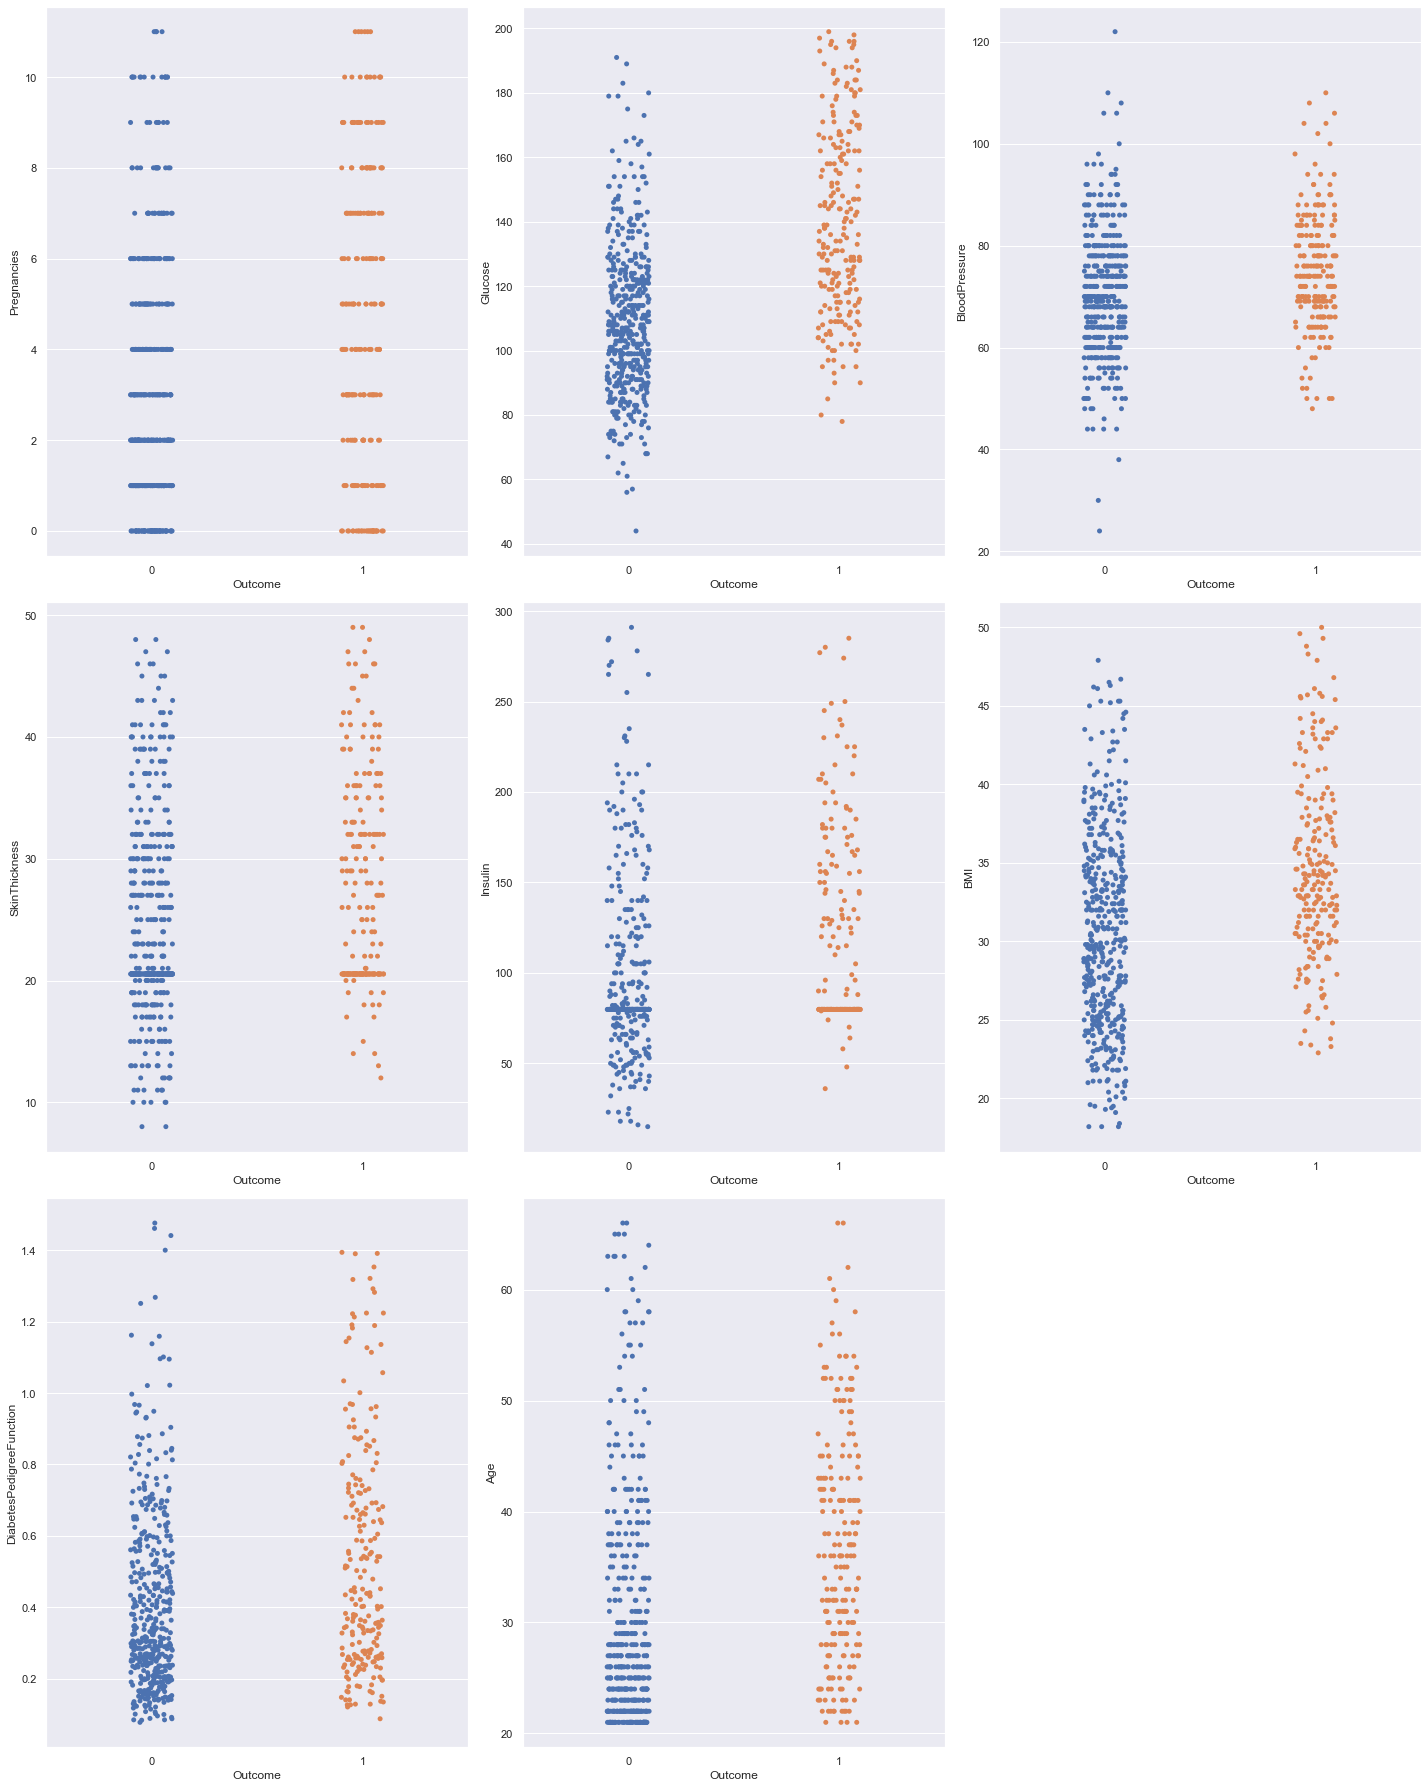

In [76]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed with checking multicollineairty in the dependent variables.
Before that, we should scale our data. Let's use standardscaler for that.

In [77]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [78]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [79]:
#multicoliner propertie
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif


,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


Great, all the vif values are less than 5 and are very low. That means no multicollinearity. 
Now we can go ahead with fitting our data in the model.
Before that let's split our data in test and training set.

In [ ]:
# agar 5 se jada hai toh vo column remove kr stke hai , tho uske liye Correlaton check karege derived feature k sath(y)
# jiska bhi corr "y"  k sath jada hoga usko rehne dege baki ko remove kardege
# ek or chiz sikhi ki 2 column ko multply krdiya or jo column VIF high btare the dono ko hta diya toh high accuracy arahi hai
#(check youtube Unfold Data Science)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [81]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [82]:
## model saving or pickling our model
import pickle
with open('modelforprediction','wb') as f:
    pickle.dump(log_reg,f)

with open('standardscalar.sav','wb')  as f:
    pickle.dump(scalar,f)

'''with open('modelforprediction','rb') as f:
    pickle.load(f)'''   # to load the model

"with open('modelforprediction','rb') as f:\n    pickle.load(f)"

In [83]:
# r2 score
log_reg.score(x_train,y_train)

0.7742574257425743

In [84]:
# adj_r2 score

adj_r2(x_train,y_train,log_reg.score(x_train,y_train))

0.7706164164803577

Great, our adjusted r2 score is almost same as r2 score, thus we are not being penalized for use of many features.




let's see how well our model performs on the test data set.

In [85]:
y_pred = log_reg.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.834319526627219

In [87]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,   8],
       [ 20,  32]], dtype=int64)

In [88]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [89]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.834319526627219

In [90]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [91]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [92]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178

In [93]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7735042735042735

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

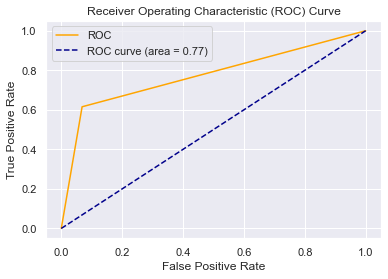

In [95]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()